# Mobilenet V2

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import PIL
import cv2
import pathlib
import numpy as np

In [8]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",input_shape=(128,128,3))
])

In [9]:
np.array(PIL.Image.open("Gold_fish.jpg").resize((128,128))).reshape(1,128,128,3)

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [10]:
img=np.array(PIL.Image.open("Gold_fish.jpg").resize((128,128))).reshape(1,128,128,3)

In [11]:
img.shape

(1, 128, 128, 3)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              1692489   
                                                                 
Total params: 1692489 (6.46 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [13]:
model.predict(img)

1/1 [==============================] - 3s 3s/step


array([[-0.09017253, -1.3932223 ,  3.9691787 , ..., -1.9367064 ,
         0.45936754, -0.69347227]], dtype=float32)

In [14]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 22ms/step


905

# Using pretrained Model for Custom classes

In [41]:
model = keras.models.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",input_shape=(128,128,3),trainable=False),
    keras.layers.Dense(5,activation="sigmoid")
])
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [16]:
data_set_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [17]:
dataset_dir_string=keras.utils.get_file("flower_photos",origin=data_set_url,cache_dir=".",untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [18]:
dataset_dir_string

'./datasets/flower_photos'

In [19]:
data_dir=pathlib.Path(dataset_dir_string)

In [21]:
data_dir

PosixPath('datasets/flower_photos')

In [23]:
all_images_count=len(list(data_dir.glob("*/*.jpg")))

In [24]:
all_images_count

3670

In [25]:
all_images=list(data_dir.glob("*/*.jpg"))

In [26]:
all_images[0]

PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')

array([[[ 40,  77,  97],
        [ 37,  74,  94],
        [ 33,  70,  90],
        ...,
        [ 27,  63,  73],
        [ 28,  67,  76],
        [ 38,  81,  90]],

       [[ 46,  86, 105],
        [ 44,  84, 103],
        [ 40,  80,  99],
        ...,
        [ 39,  74,  87],
        [ 37,  75,  87],
        [ 44,  86,  99]],

       [[ 41,  84, 103],
        [ 41,  84, 103],
        [ 38,  81, 100],
        ...,
        [ 45,  80,  94],
        [ 40,  79,  93],
        [ 50,  91, 106]],

       ...,

       [[111, 119, 108],
        [117, 126, 113],
        [121, 130, 117],
        ...,
        [ 64,  82,  83],
        [ 66,  84,  85],
        [ 68,  86,  87]],

       [[125, 133, 122],
        [120, 128, 117],
        [116, 124, 113],
        ...,
        [ 60,  79,  76],
        [ 62,  81,  78],
        [ 62,  83,  80]],

       [[113, 121, 110],
        [115, 123, 112],
        [120, 128, 118],
        ...,
        [ 57,  78,  70],
        [ 58,  79,  71],
        [ 57,  80,  72]]], dtype=uint8)
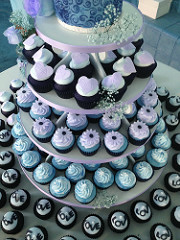

In [27]:
cv2.imread(str(all_images[0]))

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
x,y=[],[]
for flower_name,image_path in flowers_images_dict.items():
  for image in image_path:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,(128,128))
    x.append(resize_img)
    y.append(flowers_labels_dict[flower_name])

In [31]:
x=np.array(x)
y=np.array(y)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [34]:
X_train.shape

(2752, 128, 128, 3)

In [35]:
X_test.shape

(918, 128, 128, 3)

In [36]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

In [42]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 10ms/step - loss: 1.0881 - accuracy: 0.6464
Epoch 2/30
86/86 [==============================] - 1s 11ms/step - loss: 0.6244 - accuracy: 0.7823
Epoch 3/30
86/86 [==============================] - 1s 14ms/step - loss: 0.5327 - accuracy: 0.8125
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.4747 - accuracy: 0.8285
Epoch 5/30
86/86 [==============================] - 1s 13ms/step - loss: 0.4350 - accuracy: 0.8467
Epoch 6/30
86/86 [==============================] - 1s 10ms/step - loss: 0.4019 - accuracy: 0.8539
Epoch 7/30
86/86 [==============================] - 1s 10ms/step - loss: 0.3744 - accuracy: 0.8735
Epoch 8/30
86/86 [==============================] - 1s 12ms/step - loss: 0.3578 - accuracy: 0.8728
Epoch 9/30
86/86 [==============================] - 1s 10ms/step - loss: 0.3507 - accuracy: 0.8710
Epoch 10/30
86/86 [==============================] - 1s 10ms/step - loss: 0.3209 - accuracy: 0.8874
Epoch 11/

In [43]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 34ms/step - loss: 0.6859 - accuracy: 0.7876


[0.6859050989151001, 0.7875816822052002]